# About this project

In the past illness was seen as something that was caused by bad air or evil spirits. In the 1800s physicians started looking into anatomy and doing autopsies, documenting their findings and using data to find underlying causes.

Dr Ignaz Semmelweis was a Hungarian physician who worked at the Vienna General Hospital. He wanted to find the cause of childbed fever, as a high amount of women in the maternity ward of the Vienna General Hospital were dying from this infection (which wasn't known at this time yet). While women giving birth at home seemed to be less likely to die from childbirth. Dr Semmelweis suspected that something was wrong with the procedures in the hospital.

The original data, in German, can be found [here](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861). The data used in this project is derived from the original.

In this project, I am following Dr Semmelweis's notes, analyzing and visualizing the original data, using statistics to retrace his findings. In honor of a man who had to fight for and defend his discovery, saved an uncountable amount of women from dying after giving birth, and brought us a simple yet effective way to prevent infections: Washing and Sanitizing Hands.

### Import Statements

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

### Notebook Presentation

In [9]:
# display all floats with 2 digits after the decimal 
pd.options.display.float_format = '{:,.2f}'.format

# # configuring the x-axis ticks to months and years for easier plotting later
# years = mdates.YearLocator()
# months = mdates.MonthLocator()
# years_fmt = mdates.DateFormatter("%Y")

### Read the Data

In [29]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
df_monthly = pd.read_csv('monthly_deaths_total.csv')

# Data Exploration

In [11]:
print(f"Shape of yearly data: {df_yearly.shape}")
print(f"Shape of monthly data: {df_monthly.shape}")

Shape of yearly data: (12, 4)
Shape of monthly data: (98, 3)


In [12]:
print(df_yearly.head(1))
df_yearly.tail(1)

   year  births  deaths    clinic
0  1841    3036     237  clinic 1


,year,births,deaths,clinic
11,1846,3754,105,clinic 2


In [44]:
print(df_monthly.head(2))
df_monthly.tail(2)

        date  births  deaths
0 1841-01-01     254      37
1 1841-02-01     239      18


,date,births,deaths
96,1849-02-01,389,12
97,1849-03-01,406,20


In [15]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [14]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In both dataframes the date-related column is not a datetime object. For yearly data it doesn't matter as we only use the year. However the monthly data has to be converted, so it can be used later.

In [30]:
df_monthly["date"] = pd.to_datetime(df_monthly["date"])

### Check for Nan Values and Duplicates

In [33]:
print(df_yearly.isna().values.any())
df_monthly.isna().values.any()

False


False

In [34]:
print(df_yearly.duplicated().values.any())
df_monthly.duplicated().values.any()

False


False

### Descriptive Statistics

In [37]:
df_monthly.describe(exclude=["datetime"])

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


In [40]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


### Percentage of Women Dying shortly after or during Childbirth

In [64]:
yearly_births = df_yearly.births.sum()
yearly_deaths = df_yearly.deaths.sum()
death_rate = (yearly_deaths/yearly_births)*100
print(f'Chances of dying, giving birth in the 1840s in Vienna: {death_rate:,.2f}%')

Chances of dying, giving birth in the 1840s in Vienna: 7.08%


In comparison:

Canada recorded 8.3 maternal deaths per 100,000 births (or 0.0083%) in 2018. Over the 10 year span 2008 to 2018, the maternal mortality rate was between 4.5 and 8.7 deaths per 100,000 births [(source)](
https://www150.statcan.gc.ca/n1/daily-quotidien/191126/dq191126c-eng.htm).

In 2020 South Sudan was the country with the highest maternal mortality rate in the world, with 1,223 maternal deaths per 100,000 births, or 1.22% [(source)](
https://www.cia.gov/the-world-factbook/field/maternal-mortality-ratio/country-comparison/).

# Visualise the Total Number of Births and Maternal Deaths over Time

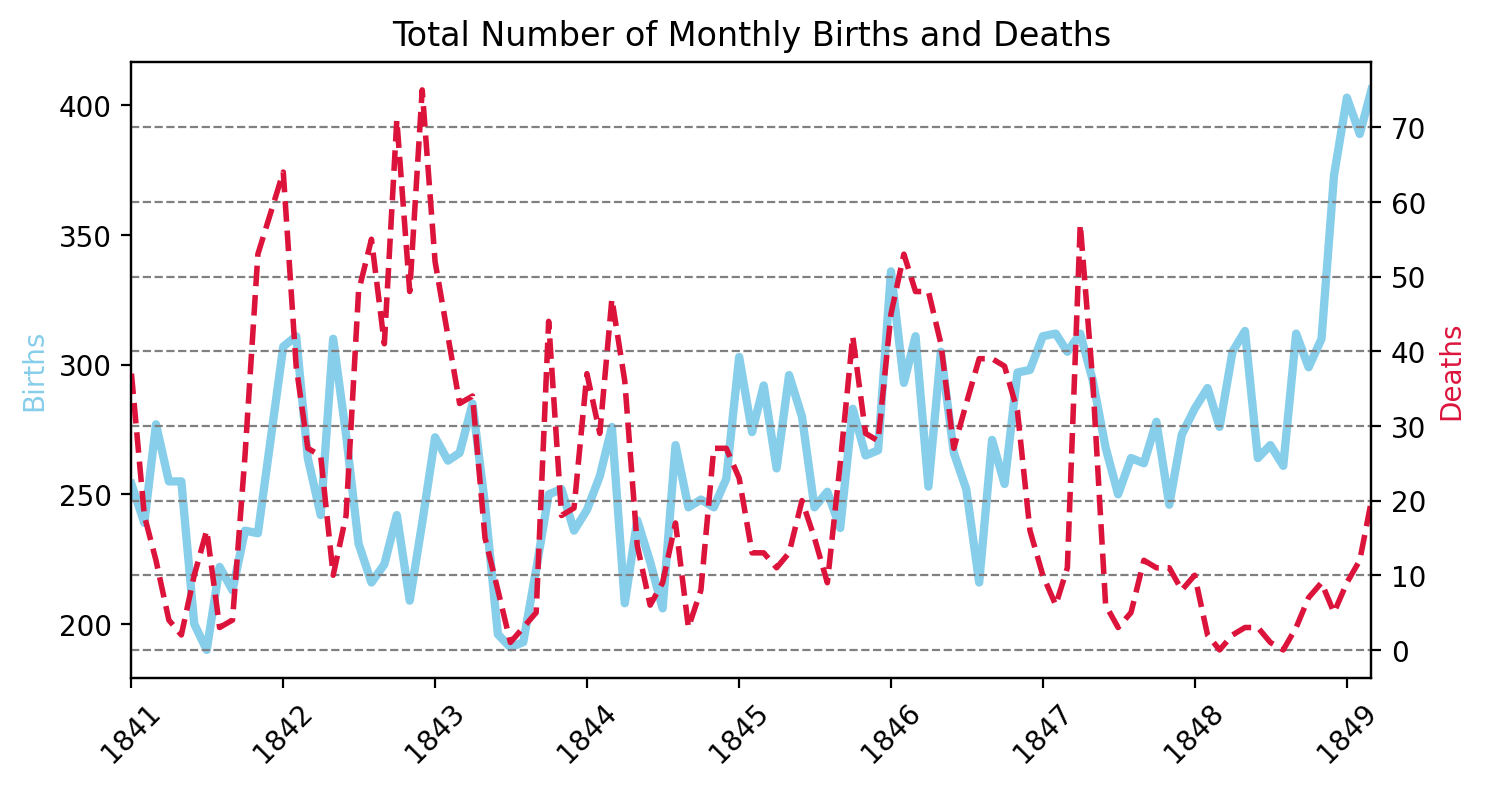

In [48]:
plt.figure(figsize=(8,4), dpi=200)
plt.xticks(rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_monthly["date"], 
         df_monthly["births"], 
         color="skyblue", 
         linewidth=3)
ax2.plot(df_monthly["date"], 
         df_monthly["deaths"], 
         color="crimson", 
         linestyle="dashed",  
         linewidth=2)
plt.title("Total Number of Monthly Births and Deaths")

ax1.set_ylabel("Births", color="skyblue")
ax2.set_ylabel("Deaths", color="crimson")

ax1.set_xlim([df_monthly["date"].min(), df_monthly["date"].max()])

plt.grid(color="grey", linestyle="--")
plt.show()

We can see that the number of deaths and number of births do not always align. Therefore, we can assume that is not a "natural" cause occuring, there seems to be an underlying reason. The data also shows, that starting mid 1847 the deaths dropped significantly despite and increasing number of births.

# The Yearly Data Split by Clinic

There were two maternity clinics at the Vienna General Hospital: clinic 1 and clinic 2. Clinic 1 was staffed by all-male doctors and medical students, and clinic 2 was staffed by female midwives.

In [50]:
births_clinic = px.line(data_frame=df_yearly,
                        x="year",
                        y="births",
                        color="clinic",
                        title="Yearly births by clinic")
births_clinic.show()

Clinic 1 was the busier of the two clinics (or maybe just bigger)

In [51]:
deaths_clinic = px.line(data_frame=df_yearly,
                        x="year",
                        y="deaths",
                        color="clinic",
                        title="Yearly deaths by clinic")
deaths_clinic.show()

Even though clinic 1 had more births, the number of deaths seems comparable high, so it should be analyzed further.

### Proportion of Deaths at Each Clinic

In [58]:
# adding a row with death percentages
df_yearly["pct_deaths"] = (df_yearly["deaths"]/df_yearly["births"])*100
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90
5,1846,4010,459,clinic 1,11.45
6,1841,2442,86,clinic 2,3.52
7,1842,2659,202,clinic 2,7.60
8,1843,2739,164,clinic 2,5.99
9,1844,2956,68,clinic 2,2.30


In [59]:
avg_death_clinic1 = (df_yearly[df_yearly["clinic"]=="clinic 1"]["deaths"].sum()/df_yearly[df_yearly["clinic"]=="clinic 1"]["births"].sum())*100
avg_death_clinic2 = (df_yearly[df_yearly["clinic"]=="clinic 2"]["deaths"].sum()/df_yearly[df_yearly["clinic"]=="clinic 2"]["births"].sum())*100
print(f"Average deaths at clini1: {avg_death_clinic1}")
print(f"Average deaths at clini2: {avg_death_clinic2}")

Average deaths at clini1: 9.924159265542361
Average deaths at clini2: 3.8839862852003826


In [61]:
death_pct_clinic = px.line(data_frame=df_yearly,
                        x="year",
                        y="pct_deaths",
                        color="clinic",
                        title="Yearly percentage of maternal death by clinic")
death_pct_clinic.show()

Plotting the percentage of deaths gives a similar picture as plotting the amount of deaths. The higher deathrate in clinic 1 can't just be explained by more births.

# The Effect of Handwashing

In June 1947 Dr Semmelweis made handwashing and the cleaning of instruments obligatory for everyone. 
Clorine was used instead of water (to get rid of the smells, bacteria and viruses as well as the effects of sanitizer on them weren't discovered yet).

In [80]:
handwashing_start = pd.to_datetime('1847-06-01')

In [63]:
df_monthly["pct_deaths"] = (df_monthly.deaths/df_monthly.births)*100

In [65]:
df_before = df_monthly[df_monthly["date"] < handwashing_start]
df_after = df_monthly[df_monthly["date"] >= handwashing_start]
avg_before = (df_before["deaths"].sum() / df_before["births"].sum())*100
avg_after = (df_after["deaths"].sum() / df_after["births"].sum())*100
print(f'Average death rate before 1847 was {avg_before:,.2f}%')
print(f'Average death rate after 1847 was {avg_after:,.2f}%')

Average death rate before 1847 was 10.53%
Average death rate after 1847 was 2.15%


After introducing mandatory cleaning, the average death rate dropped significantly.

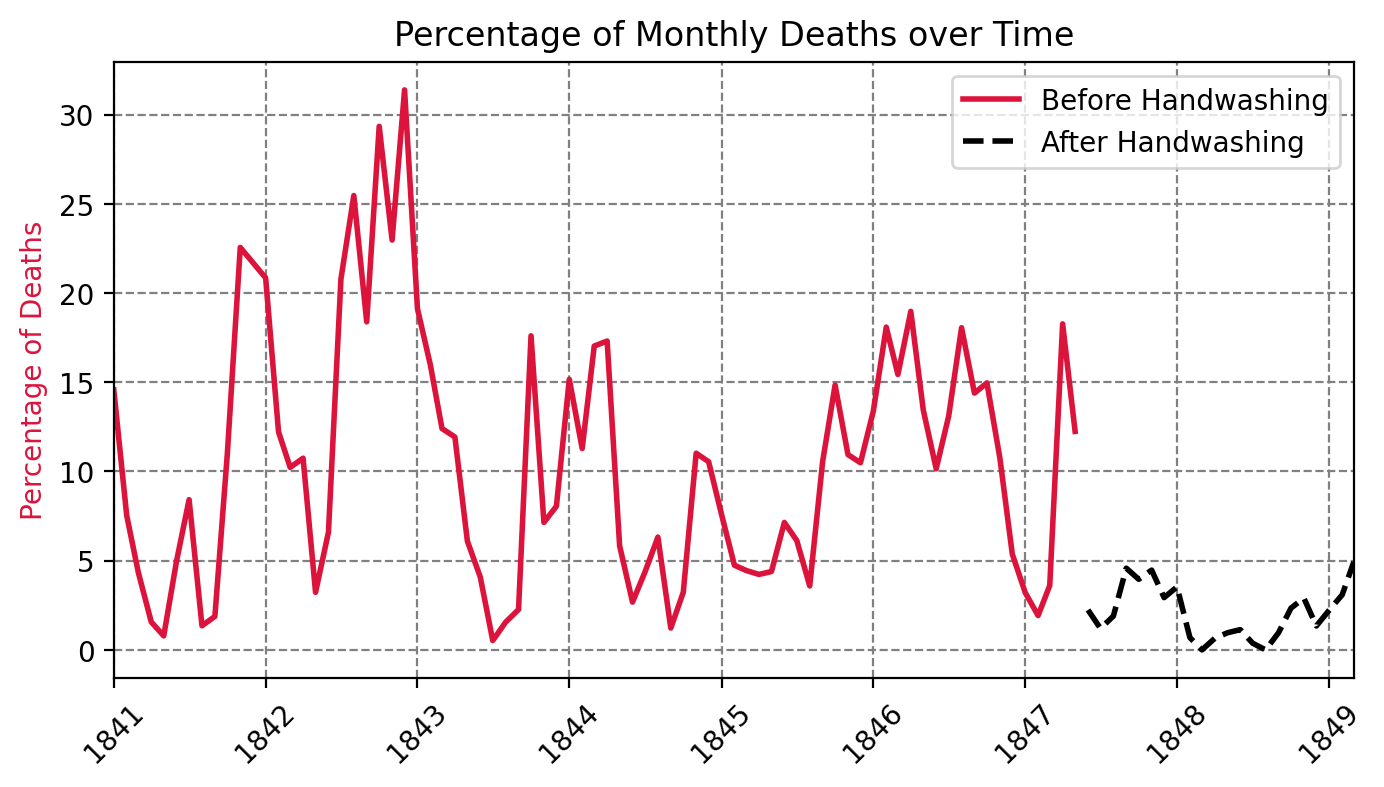

In [70]:
plt.figure(figsize=(8,4), dpi=200)
plt.title("Percentage of Monthly Deaths over Time")
plt.xticks(rotation=45)
plt.ylabel("Percentage of Deaths", color="crimson")

ax = plt.gca()

ax.set_xlim([df_monthly["date"].min(), df_monthly["date"].max()])

plt.grid(color="grey", linestyle="--")


bw_line = plt.plot(df_before["date"], 
         df_before["pct_deaths"], 
         color="crimson", 
         
         linewidth=2,
         label="Before Handwashing")

aw_line = plt.plot(df_after["date"], 
         df_after["pct_deaths"], 
         color="black", 
         linestyle="dashed", 
         linewidth=2,
         label="After Handwashing")


ax.legend()
plt.show()

In [71]:
print(f"Handwashing reduced the average chance of dying in childbirth by {avg_before-avg_after:,.2f}%.")

Handwashing reduced the average chance of dying in childbirth by 8.37%


In [74]:
print(f"The chances of maternal death after handwashing was introduced were {round(avg_before/avg_after)} times lower.")

The chances of maternal death after handwashing was introduced were 5 times lower.


In [75]:
df_monthly["washing_hands"] = np.where(df_monthly["date"] < handwashing_start, "No", "Yes")
df_monthly.tail()

,date,births,deaths,pct_deaths,washing_hands
93,1848-11-01,310,9,2.90,Yes
94,1848-12-01,373,5,1.34,Yes
95,1849-01-01,403,9,2.23,Yes
96,1849-02-01,389,12,3.08,Yes
97,1849-03-01,406,20,4.93,Yes


## Using Visualizations to depict the significant difference 

In [77]:
color_map = {'Yes': 'blue', 'No': 'red'}
boxplot = px.box(data_frame=df_monthly,
          x="washing_hands",
          y="pct_deaths",
          color="washing_hands",
          title="Change in Maternal Death before and after mandatory Handwashing",
          color_discrete_map=color_map)

boxplot.update_layout(xaxis_title="Washing Hands?",
                      yaxis_title="Maternal Death Rate")
boxplot.show()

In [79]:
color_map = {'Yes': 'blue', 'No': 'red'}
histogram = px.histogram(data_frame=df_monthly,
                         x="pct_deaths",
                         color="washing_hands",
                         histnorm="percent",
                         barmode="overlay",
                         opacity=0.7,
                         nbins=30,
                         marginal="box",
                         color_discrete_map=color_map)

histogram.update_layout(xaxis_title="Maternal Death Rate in %",
                        yaxis_title="Count")

histogram.show()

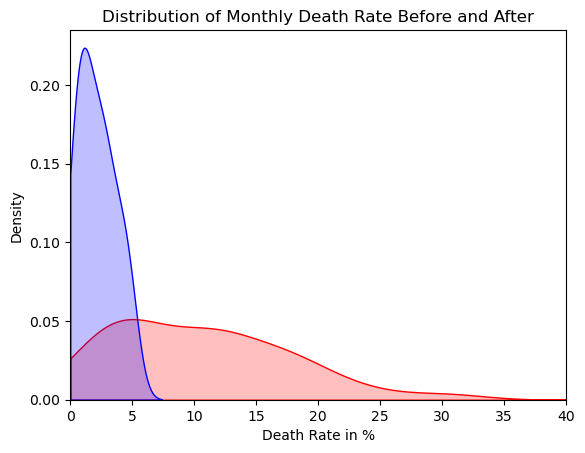

In [87]:
sns.kdeplot(data=df_before,
            x="pct_deaths",
            fill=True,
            color="red",
            clip=(0,100))

sns.kdeplot(data=df_after,
            x="pct_deaths",
            fill=True,
            color="blue",
            clip=(0,100))

plt.title("Distribution of Monthly Death Rate Before and After")
plt.ylabel("Density")
plt.xlabel("Death Rate in %")
plt.xlim(0,40)        
plt.show()

### Statistical Significance

Is the lower death rate by chance or statistically significant?

In [88]:
from scipy import stats

In [90]:
t_stat, p_value = stats.ttest_ind(a=df_before["pct_deaths"],
                                  b=df_after["pct_deaths"])
print(f'p-value is {p_value:.10f}')
print(f't-statistic is {t_stat:.4f}')

p-value is 0.0000002985
t-statistic is 5.5116


The closer the p-value is to 0, the less likely the results are due to chance.
With a p-value very close to 0, we can assume taht the results are statistically significant and that Handwashing indeed makes a difference.

Futhermore a t-statistic of 2 or higher is considered to be statistically significant and therefore the t-statistic of over 5 is another indicator for the statistical significance of Dr Semmelweis's findings.